# Machine Learning HW 1
### By: Niral Shah
### 01/24/17

In [87]:
# Import statements:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable

## Problem 1 Perceptron Algorithm & Convergence Analysis: 

### Problem 1.1a)


Weight vector from running perceptron: [ 1.  0.]



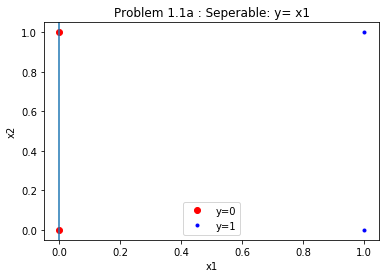

In [151]:
xval = np.zeros(shape=(4,2))
xval[0] = [0,0] # 0
xval[1] = [0,1] #0 
xval[2] = [1,0] # 1
xval[3] = [1,1] # 1

yl = np.zeros(shape=(4,1))
yl[2] = 1
yl[3] = 1

x0 = xval[0:2]; y0 = yl[0:2]
x1 = xval[2:4]; y1 = yl[2:4]

w_bool = np.zeros((2))
ret = perceptron(xval,yl, test_data=np.zeros(shape=(4,2)),test_labels=np.zeros(shape=(4,1)),w=w_bool, I=10)
print ""
print "Weight vector from running perceptron: "+str(ret[0])
print ""
fig, ax = plt.subplots()
ax.plot(x0[:,0], x0[:,1], 'ro',label='y=0')
ax.plot(x1[:,0],x1[:,1],'b.',label='y=1')
plt.title('Problem 1.1a : Seperable: y= x1')
plt.xlabel('x1')
plt.ylabel('x2')
ax.axvline(x=0)
legend = ax.legend()
plt.show()

### Problem 1.1b)

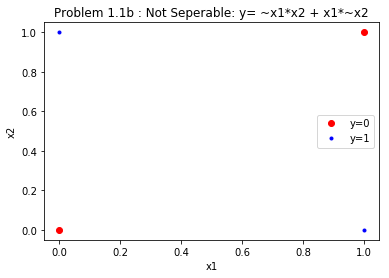

In [145]:
#1.1b: 
xval = np.zeros(shape=(4,2))
xval[0] = [0,0] # 0
xval[1] = [0,1] #1
xval[2] = [1,0] # 1
xval[3] = [1,1] # 0

yl = np.zeros(shape=(4,1))
yl[1] = 1
yl[2] = 1



x0 = np.append([xval[0]],[xval[3]],axis=0)
x1 = np.append([xval[1]],[xval[2]], axis=0)
fig, ax = plt.subplots()

ax.plot(x0[:,0], x0[:,1], 'ro',label='y=0')
ax.plot(x1[:,0],x1[:,1],'b.',label='y=1')
legend = ax.legend()
plt.title('Problem 1.1b : Not Seperable: y= ~x1*x2 + x1*~x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


#### Explanation:
* The boolean function y= ~x1*x2+ x1*~x2 is not seperable because there is no hyper plane that can evenly seperate the data. As evident by looking at the graph above, no way of slicing the graph will achieve accuracy for y=0 and y=1



### Problem 1.1c)


Weight vector from running perceptron: [ 0.  0.  1.]



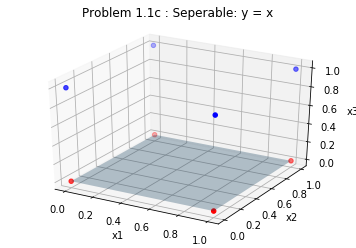

In [147]:
xval = np.zeros(shape=(8,3))
yval = np.zeros((8));
xval[1] = [0,0,1]; yval[1]=1;
xval[3] = [0,1,1]; yval[3]=1;
xval[5] = [1,0,1]; yval[5]=1;
xval[7] = [1,1,1]; yval[7]=1;
xval1 = np.concatenate( ([xval[1]],[xval[3]],[xval[5]],[xval[7]]))

yval[0]=0;
xval[2] = [0,1,0]; yval[2]=0;
xval[4] = [1,0,0]; yval[4]=0;
xval[6] = [1,1,0]; yval[6]=0;
xval0 = np.concatenate(([xval[0]],[xval[2]],[xval[4]],[xval[6]]))


w_bool = np.zeros((3))
ret = perceptron(xval,yval, test_data=np.zeros(shape=(8,3)),test_labels=np.zeros(shape=(8,1)),w=w_bool, I=10)
print ""
print "Weight vector from running perceptron: "+str(ret[0])
print ""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xval0[:,0], xval0[:,1], xval0[:,2], zdir='z', c= 'red',label='y=0')
ax.scatter(xval1[:,0], xval1[:,1], xval1[:,2], zdir='z', c= 'blue',label='y=1')
ax.set_zlabel('x3')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
legend = ax.legend()
xx, yy = np.meshgrid(range(2), range(2))
z = np.zeros(len(xx))
ax.plot_surface(xx, yy, z, alpha=0.3)

plt.title('Problem 1.1c : Seperable: y = x\n')
plt.show()

### Problem 1.2:  Euclidean Distance Proof 
# ------------------------------------

<img src="/files/Proof12.png">

# ----------------------

### Problem 1.3: Perceptron Convergence Proof 

<img src="files/Proof.png">,

# ----------------------

## Problem 2: Programming Assignment 

In [91]:
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Extract testing and validation data 
* Number 4 has label of 1
* Number 9 has label of -1

In [154]:
# Number 4 has the label : 1
train_dig4 = mnist.train.images[mnist.train.labels==4]
train_ydig4 = np.ones(len(train_dig4))

# Number 9 has the label : -1
train_dig9 = mnist.train.images[mnist.train.labels==9]
train_ydig9 = -1*np.ones(len(train_dig9))


In [155]:
# Number 4 has the label : 1
test_dig4 = mnist.test.images[mnist.test.labels==4]
test_ydig4 = np.ones(len(test_dig4))

#Number 9 has the label : -1
test_dig9 = mnist.test.images[mnist.test.labels==9]
test_ydig9 = -1*np.ones(len(test_dig9))

In [156]:
# Combine train and test
train = np.append(train_dig4, train_dig9, axis=0)
train_labels = np.append(train_ydig4, train_ydig9)

test = np.append(test_dig4,test_dig9, axis=0)
test_labels = np.append(test_ydig4, test_ydig9)

In [157]:
# Shuffle the data, seed = 2018
np.random.seed(seed=2018)
permutation = np.random.permutation(train.shape[0])

train = train[permutation]
train_labels = train_labels[permutation]


In [158]:
permutation = np.random.permutation(test.shape[0])
test = test[permutation]
test_labels = test_labels[permutation]

## Problem 2.1)

In [159]:
def predict(data,labels, w):    
    count = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    N = len(labels)
    for i in range(0,N):
        x = data[i]
        y = labels[i]
        if(y*np.matmul(np.transpose(w), x)<=0):
            if(y==1):
                fn+=1;
            else:
                fp+=1;
            count+=1;
        else:
            if(y==1):
                tp+=1;
            else:
                tn+=1;
    return (count,tp,fp,tn,fn)

### Problem 2.1a & Problem 2.1b)

In [160]:
def perceptron(data,labels,test_data, test_labels,w = np.zeros((784)),I = 100):
    N = len(labels)
    acc = np.zeros((I))
    acc_test = np.zeros((I))
    for e in range(1,I+1):
        metrics = predict(data,labels,w)[0]
        acc[e-1] = 1-(metrics)/float(N)
        metrics_test = predict(test_data, test_labels,w)[0]
        acc_test[e-1] = 1-(metrics_test)/float(N)
        for i in range(0,N):
            y = labels[i]
            x = data[i]
            if(y*np.matmul(np.transpose(w), x)<=0):
                w = w + y*x
    return (w,acc,acc_test)            

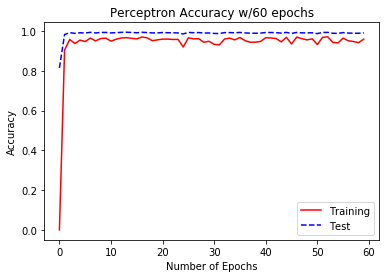

Training Accuracy at end of epoch:60: 0.959483319394
Testing Accuracy at end of epoch:60: 0.991078896013


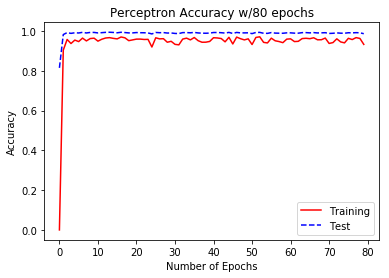

Training Accuracy at end of epoch:80: 0.9330917201
Testing Accuracy at end of epoch:80: 0.986804200353


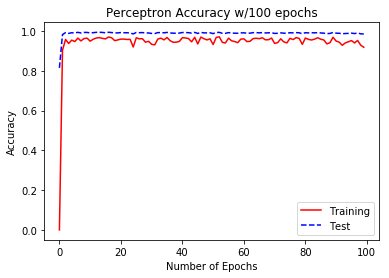

Training Accuracy at end of epoch:100: 0.918687854289
Testing Accuracy at end of epoch:100: 0.985224421522


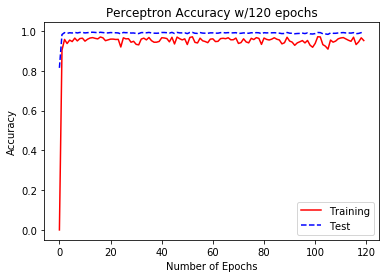

Training Accuracy at end of epoch:120: 0.952420778738
Testing Accuracy at end of epoch:120: 0.990428398848


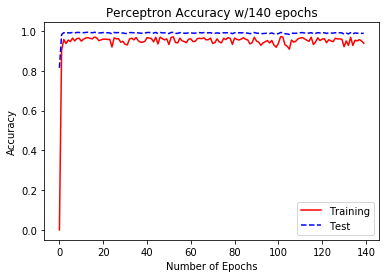

Training Accuracy at end of epoch:140: 0.938667410092
Testing Accuracy at end of epoch:140: 0.988476907351


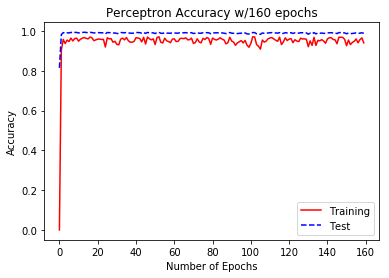

Training Accuracy at end of epoch:160: 0.940804757922
Testing Accuracy at end of epoch:160: 0.988476907351


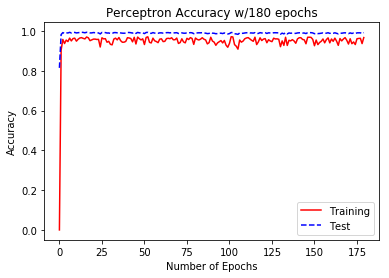

Training Accuracy at end of epoch:180: 0.967382213549
Testing Accuracy at end of epoch:180: 0.992194034012


In [164]:
for I in range(60,200,20):
    retvals = perceptron(train,train_labels,test,test_labels, I=I)
    w = retvals[0]
    acc_val = retvals[1]
    acc_test = retvals[2]
    ep = np.arange(0,I)
    fig, ax = plt.subplots()
    ax.plot(ep,acc_val,'r',label='Training')
    ax.plot(ep,acc_test,'b--',label='Test')
    legend = ax.legend()
    ax.set_yticks(np.linspace(0,1,0.05),minor=True)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epochs')
    plt.title('Perceptron Accuracy w/'+str(I)+' epochs')
    plt.show()
    print "Training Accuracy at end of epoch:"+ str(I)+": " + str(acc_val[I-1])
    print "Testing Accuracy at end of epoch:"+ str(I)+": " + str(acc_test[I-1])
    
    

### Explanation 2.1a & 2.1b) 


* 2.1a) As the number of epochs increases the training accuracy generally increases. There are few number of epochs where the training accuracy fell. As can be seen, at 100 epochs the accuracy fell, but then by 180 epochs training accuracy performed the best with 96.7% accuracy


* 2.1b) For the test set, without question, increasing the number of epochs improved accuracy, achieving 99.2% accuracy by the 180 epochs. 

### Problem 2.1c) Confusion Matrix:

In [166]:
retvals = perceptron(train,train_labels,test,test_labels, I=100)
cmetrics = predict(test,test_labels,w=retvals[0])

In [173]:
print('Confusion Matrix for Test Data')
print('------------------')
print('True Positives: '+str(cmetrics[1]))
print('False Positives: '+str(cmetrics[2]))
print('False Negative: '+str(cmetrics[4]))
print('True Negative: '+str(cmetrics[3]))
print('------------------')
print("Overall accuracy:"+str(1-cmetrics[0]/float(len(test))))

Confusion Matrix for Test Data
------------------
True Positives: 970
False Positives: 123
False Negative: 12
True Negative: 886
------------------
Overall accuracy:0.932194876946


### Problem 2.1d) ROC Curve

In [174]:
#1d (updated for w*)
def perceptron(data,labels,test_data, test_labels,w = np.zeros((784)),I = 100):
    N = len(labels)
    acc = np.zeros((I))
    acc_test = np.zeros((I))
    wstar = w #intiatlize to 0
    for e in range(1,I+1):
        metrics = predict(data,labels,w)[0]
        acc[e-1] = 1-(metrics)/float(N)
        metrics_test = predict(test_data, test_labels,w)[0]
        acc_test[e-1] = 1-(metrics_test)/float(N)
        for i in range(0,N):
            y = labels[i]
            x = data[i]
            if(y*np.matmul(np.transpose(w), x)<=0):
                w = w + y*x
                if(e==1 and i<=0.3*N):
                    wstar = w
    return (w,wstar,acc,acc_test)     

In [182]:
retvals = perceptron(train,train_labels,test,test_labels, I=100)

In [175]:
def getThresholds(w,data):
    thresholds = np.zeros(len(data))
    for i in range(0,len(data)):
        thresholds[i] = np.matmul(np.transpose(w),data[i])
    return thresholds
    

In [176]:
def generateROC(w,data,labels):
    
    thresholds = getThresholds(w,data)
    
    roc = np.zeros([len(data)+3,2]) #(fpr,tpr)
    roc[len(roc)-1]=[1,1]
    roc[0]=[0,0]    
    
    w_pred= predict(data,labels,w) #returns tuple like this: (count,tp,fp,tn,fn)
    
    fpr = (w_pred[2])/float(w_pred[2]+w_pred[3]) #fp/(fp+tn)
    tpr = (w_pred[1])/float(w_pred[1]+w_pred[4]) #tp/(tp+fn)
    roc[1] = [fpr,tpr] # count actual w accuracy
    roc[2] = [1,1]
    
    for i in range(0,len(thresholds)):
        w_pred= predict(data,labels,w-thresholds[i])
        fpr = (w_pred[2])/float(w_pred[2]+w_pred[3])
        tpr = (w_pred[1])/float(w_pred[1]+w_pred[4])
        roc[i+2] = [fpr,tpr]
        
    roc.sort(axis=0)
    return roc

In [187]:
w = retvals[0]
train_roc = train
train_labelsR=train_labels
roc = generateROC(w,train_roc,train_labelsR)

In [189]:
wstar = retvals[1]
roc_star = generateROC(wstar,train_roc,train_labelsR)

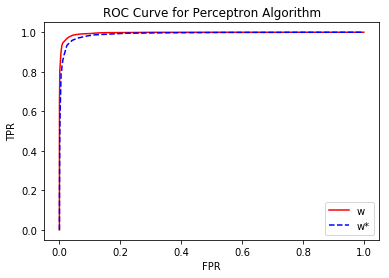

In [190]:
fig, ax = plt.subplots()
ax.plot(roc[:,0],roc[:,1],'r-', label='w')
ax.plot(roc_star[:,0],roc_star[:,1],'b--',label='w*')
legend = ax.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Perceptron Algorithm')
plt.show()

### 2.1d)
* It can be said that w' (w star) leads to a better decision boundary because overall it will not be as overfitted to the training data compared to w. Since w* only looks at 1/3 of the data and goes through only 1 epoch, while w is updated for each epoch and for each image continously. 

### 2.1e)

In [193]:
auc = np.trapz(roc[:,1],x=roc[:,0]) #AUC
print "AUC for w: "+str(auc)
auc_wstar = np.trapz(roc_star[:,1],x=roc_star[:,0]) #AUC
print "AUC for w*: "+str(auc_wstar)

AUC for w: 0.996659610374
AUC for w*: 0.99060117996


* The AUC's seem to match the curves draw above. Clearly its an almost perfect box, so having an AUC near 1 is reasonable. 

## Problem 2.2: Balanced Winnow

In [111]:
def predict_winnow(data,labels, wp,wn):    
    count = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    N = len(labels)
    for i in range(0,N):
        x = data[i]
        y = labels[i]
        if(y*(np.matmul(np.transpose(wp), x)-np.matmul(np.transpose(wn), x))<=0):
            if(y==1):
                fn+=1;
            else:
                fp+=1;
            count+=1;
        else:
            if(y==1):
                tp+=1;
            else:
                tn+=1;
    return (count,tp,fp,tn,fn)

In [112]:
#2a
def balanced_winnow(data,labels,test_data, test_labels,eta,I = 100):
    N = len(labels)
    acc = np.zeros((I))
    acc_test = np.zeros((I))
    ip = (1/float(2*N))
    
    wp = ip*np.ones((784))
    wn = ip*np.ones((784))
    
    for e in range(1,I+1):
        metrics = predict_winnow(data,labels,wp,wn)[0]
        acc[e-1] = 1-(metrics)/float(N)
        metrics_test = predict_winnow(test_data, test_labels,wp,wn)[0]
        acc_test[e-1] = 1-(metrics_test)/float(N)
            
        for i in range(0,N):
            y = labels[i]
            x = data[i]
            val1 = np.matmul(np.transpose(wp), x)
            val2 = np.matmul(np.transpose(wn), x)
            if(y*(val1-val2)<=0):
                wp = wp*np.exp(eta*y*x)
                wn = wn*np.exp(-1*eta*y*x)
                s = wp+wn
                wp = np.divide(wp,s)
                wn = np.divide(wn,s)       
    return (wp,wn,acc,acc_test)     


### Problem 2.2a)

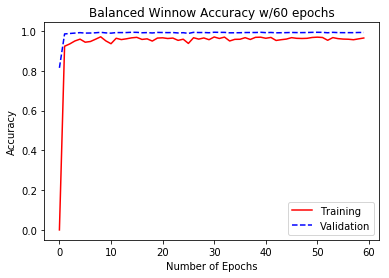

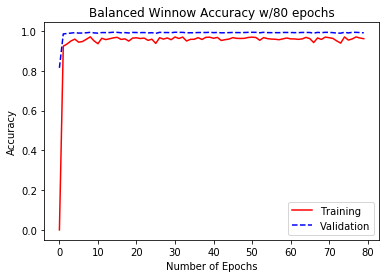

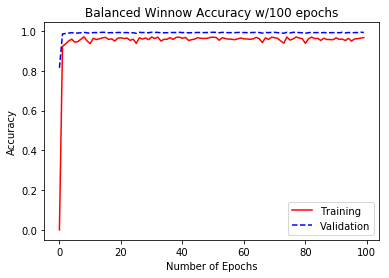

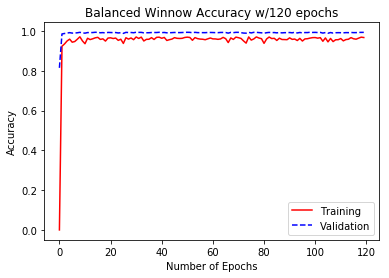

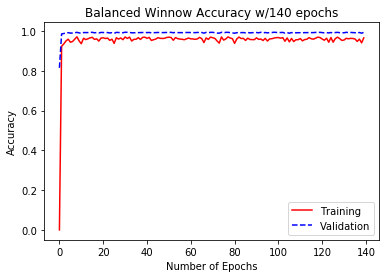

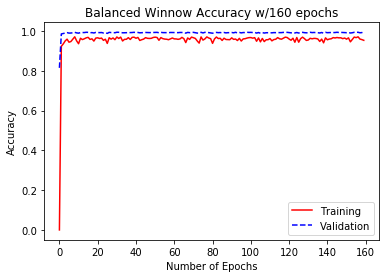

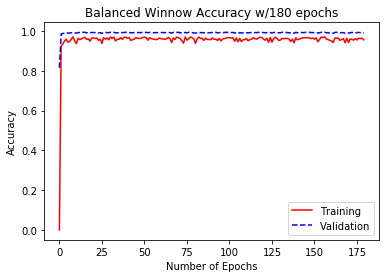

In [195]:
#Part 2a #Training

for I in range(60,200,20):
    retvals = balanced_winnow(train,train_labels,test,test_labels,eta=0.1, I=I)
    wp = retvals[0]
    wn = retvals[1]
    acc_val = retvals[2]
    acc_test = retvals[3]
    ep = np.arange(0,I)
    fig, ax = plt.subplots()
    ax.plot(ep,acc_val,'r',label='Training')
    ax.plot(ep,acc_test,'b--',label='Validation')
    legend = ax.legend()
    ax.set_yticks(np.linspace(0,1,0.05),minor=True)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epochs')
    plt.title('Balanced Winnow Accuracy w/'+str(I)+' epochs')
    plt.show()

In [196]:
cmetrics = predict_winnow(test,test_labels,wp=retvals[0],wn=retvals[1])

print('Confusion Matrix for Test Data')
print('------------------')
print('True Positives: '+str(cmetrics[1]))
print('False Positives: '+str(cmetrics[2]))
print('False Negative: '+str(cmetrics[4]))
print('True Negative: '+str(cmetrics[3]))
print('------------------')
print("Overall accuracy:"+str(1-cmetrics[0]/float(len(test))))

Confusion Matrix for Test Data
------------------
True Positives: 947
False Positives: 56
False Negative: 35
True Negative: 953
------------------
Overall accuracy:0.95429432446


### Problem 2.2b)

In [198]:
acc_val = np.zeros((20))
acc_test = np.zeros((20))
eta_val = np.zeros((20))
count =0
for e in np.linspace(0,0.5,20): #try values less than 0.1
    retvals = balanced_winnow(train,train_labels,test,test_labels,eta=e, I=60)
    acc_val[count] = retvals[2][59]
    acc_test[count] = retvals[3][59]
    eta_val[count] = e
    count +=1

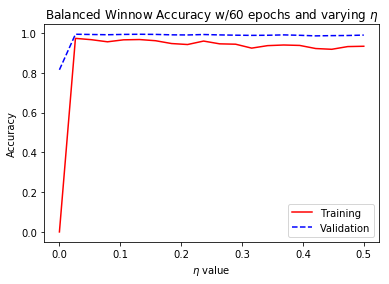

In [207]:
fig, ax = plt.subplots()
ax.plot(eta_val,acc_val,'r',label='Training')
ax.plot(eta_val,acc_test,'b--',label='Validation')
legend = ax.legend()
plt.ylabel('Accuracy')
plt.xlabel('$\eta$ value')
plt.title('Balanced Winnow Accuracy w/60 epochs and varying $\eta$')
plt.show()

In [217]:
print "Max accuracy (training):"+ str(acc_val.max()) 
print 'Best eta val for training:' + str(eta_val[acc_val.argmax()])
print ""
print "Max accuracy (training):"+ str(acc_test.max()) 
print 'Best eta val for training:' + str(eta_val[acc_test.argmax()])

Max accuracy (training):0.972864975374
Best eta val for training:0.0263157894737

Max accuracy (training):0.99358795651
Best eta val for training:0.0263157894737


#### Conclusion:
* It appears that an eta value of about 0.026 works better than others. In the future it would be worth using cross validation to properly tune the eta parameter. 